In [ ]:
%cd /content
!git clone https://github.com/lalbright22/DataScience2023.git
%cd /content/DataScience2023/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content
Cloning into 'DataScience2023'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 9.81 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/DataScience2023


In [ ]:
!mkdir -p ../baseballdatabank-2023.1.
!unzip ../baseballdatabank-2023.1.zip -d ../baseballdatabank-2023.1.

<ipython-input-38-df94c97e9784>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_15.loc[:, "salary"] = pd.to_numeric(salaries_15["salary"])
<ipython-input-38-df94c97e9784>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  salaries_15.loc[:, "salary"] = pd.to_numeric(salaries_15["salary"])


<Axes: title={'center': 'Total Wins vs. Total Spending'}, xlabel='Total Wins', ylabel='Total Spent on Player Salaries'>

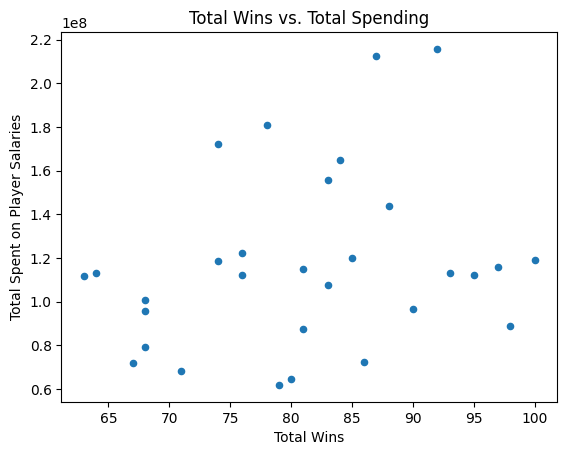

In [ ]:
salaries = pd.read_csv("Salaries.csv", header = None, names = ["yearID", "teamID", "lgID", "playerID", "salary"], encoding = "ISO-8859-1", delimiter = ",")

teams = pd.read_csv("Teams.csv", header = None, names = ["yearID","lgID","teamID","franchID","divID","Rank","G","GHome","W","L","DivWin","WCWin","LgWin","WSWin","R","AB","H","2B","3B","HR","BB","SO","SB","CS","HBP","SF","RA","ER","ERA","CG","SHO","SV","IPOuts","HA","HRA","BBA","SOA","E","DP","FP","name","park","attendance","BPF","PPF","teamIDBR","teamIDlahman45","teamIDretro"])



salaries_15 = salaries[salaries["yearID"] == "2015"]
teams_15 = teams[teams["yearID"] == "2015"]

#salaries_15.dtypes
#salaries_15.head()
#teams_15.head()

salaries_15.loc[:, "salary"] = pd.to_numeric(salaries_15["salary"])

team_salaries = salaries_15.groupby("teamID")["salary"].sum().reset_index()


final_df = pd.merge(team_salaries, teams_15, on = "teamID")

final_df["W"] = pd.to_numeric(final_df["W"])
#final_df.head()

final_df = final_df.sort_values(by = "W")
final_df.plot.scatter(x = "W", y = "salary", xlabel = "Total Wins", ylabel = "Total Spent on Player Salaries", title = "Total Wins vs. Total Spending")

#salaries.head()
#teams.head()



In [ ]:
! rm -r /content/DataScience2023

In [ ]:
%cd /content
!git clone https://github.com/jmanzer7/DataScience.git
%cd /content/DataScience/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/content
Cloning into 'DataScience'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 23.74 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/DataScience


In [ ]:
ff = pd.read_csv("ff.csv")
ff.head()

,Date,Mkt-RF,SMB,HML,RF
0,20150102,-1.39,0.10,0.53,0.0
1,20150109,-0.78,-0.36,-2.35,0.0
2,20150116,-1.32,0.43,-0.47,0.0
3,20150123,1.64,-0.68,-0.28,0.0
4,20150130,-2.50,0.60,-0.58,0.0


In [ ]:
spy = pd.read_csv("SPY.csv")
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20150102.0,206.380005,206.880005,198.860001,202.309998,172.849808,625596600.0
1,20150109.0,204.009995,206.419998,198.570007,200.860001,171.610977,857725600.0
2,20150116.0,201.630005,203.660004,198.550003,203.080002,173.507751,642427300.0
3,20150123.0,203.990005,206.259995,199.910004,200.139999,170.995834,686441400.0
4,20150130.0,200.380005,205.380005,197.860001,204.059998,174.345032,792941700.0


<Axes: title={'center': 'Market Risk Premium vs SP500 level'}, xlabel='SP500 Index', ylabel='Mkt-RF'>

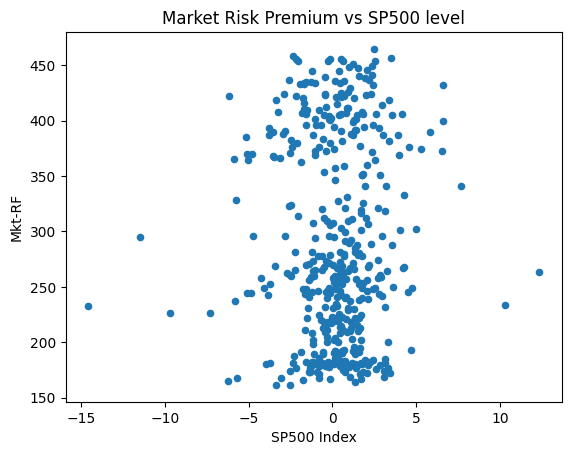

In [ ]:
df = pd.merge(spy, ff)
df.head()
df.plot.scatter(x = "Mkt-RF", y = "Adj Close", xlabel = "SP500 Index", ylabel = "Mkt-RF", title = "Market Risk Premium vs SP500 level")